## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

#### Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
file_path = "../data/diabetes.csv"
diabetes_data = pd.read_csv(file_path)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diabetes_data[cols] = diabetes_data[cols].replace(to_replace={0: np.nan})

**<font color='teal'> Plot histograms of each column. </font>**

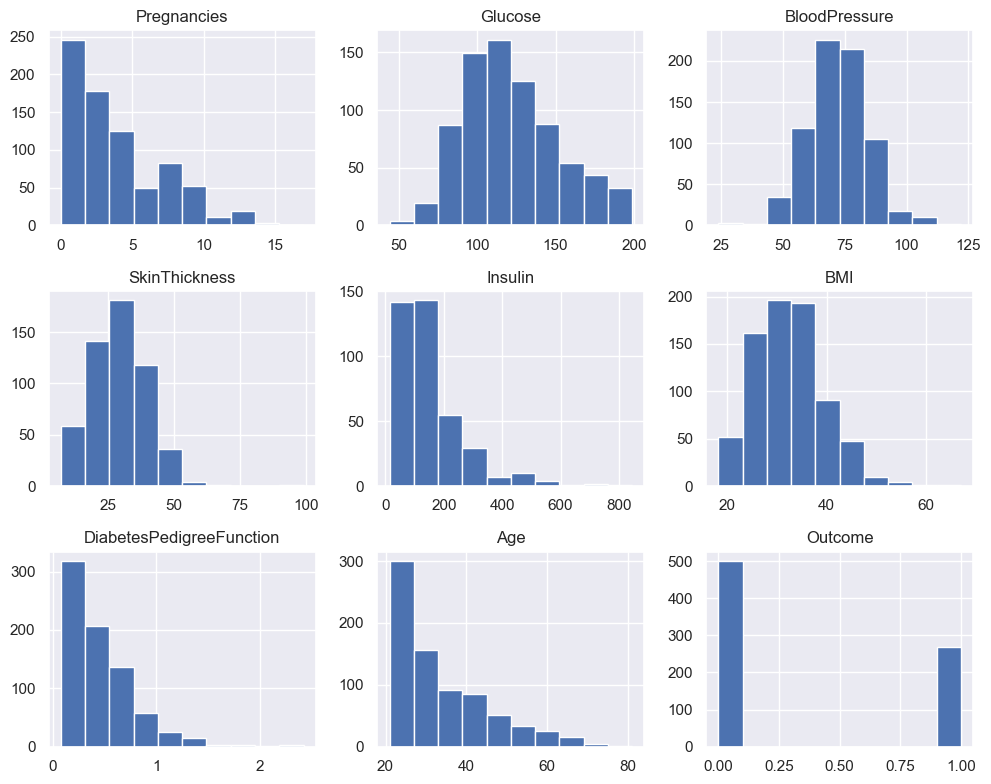

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
diabetes_data.hist(ax=axes)
fig.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [7]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

<Figure size 640x480 with 0 Axes>

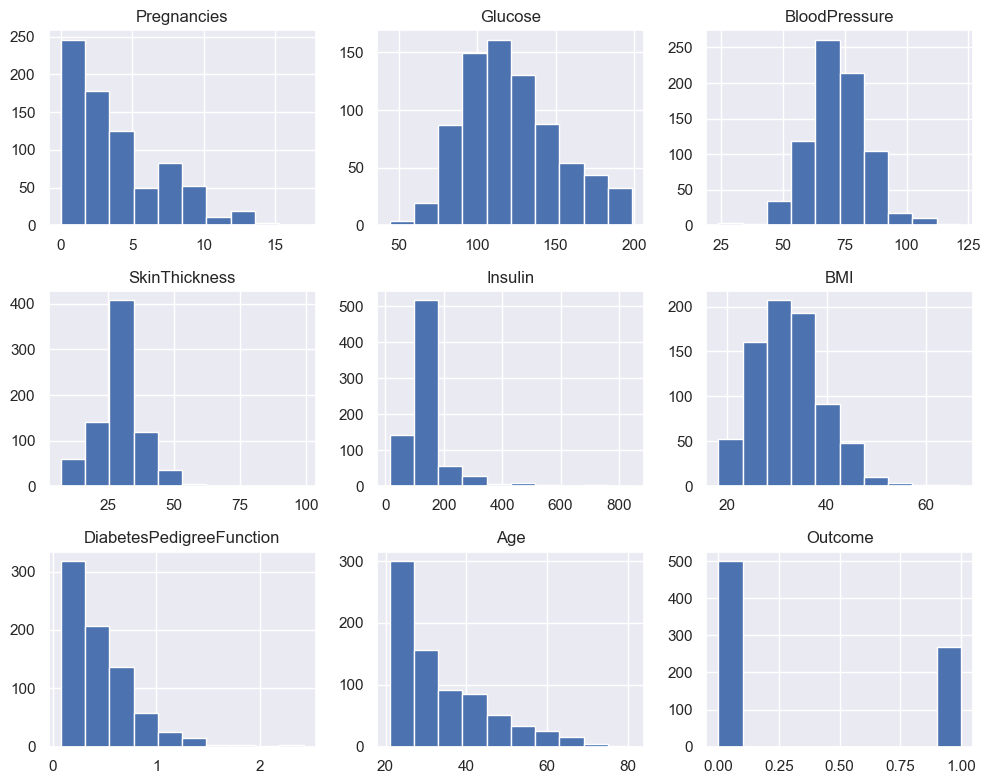

In [8]:
plt.clf()
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
diabetes_data.hist(ax=axes)
fig.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

In [9]:
# fig, ax = plt.subplots(figsize=(10,6))
# sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues', ax=ax)
# plt.title("Correlation Between Various Features", fontsize=20)
# plt.show()

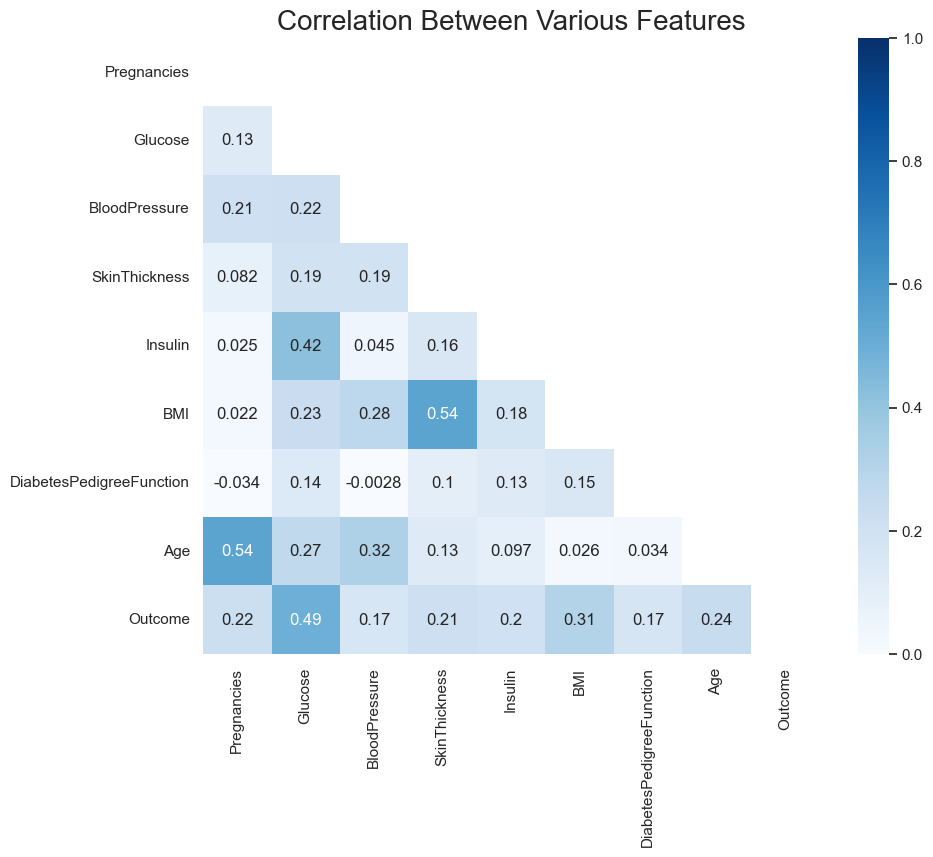

In [10]:
corr = diabetes_data.corr()
mask = np.zeros_like(corr) # Return an array of zeros with the same shape and type as a given array.
mask[np.triu_indices_from(mask)] = True # Return the indices for the upper-triangle of mask.
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, mask=mask, vmin=0, vmax=1, square=True, annot=True, cmap="Blues")
plt.title("Correlation Between Various Features", fontsize=20)
plt.show()

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [11]:
X = diabetes_data.drop(labels=["Outcome"], axis=1)
y = diabetes_data["Outcome"]

In [12]:
print(f"X: {X.shape}\ny: {y.shape}")

X: (768, 8)
y: (768,)


**<font color='teal'> Create a 70/30 train and test split. </font>**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [16]:
scores_df = pd.DataFrame({"n_neighbors": range(1, 10),
              "train_scores": train_scores,
              "test_scores": test_scores}).set_index(["n_neighbors"])
scores_df

,train_scores,test_scores
n_neighbors,,
1,1.000000,0.679654
2,0.843575,0.714286
3,0.849162,0.714286
4,0.802607,0.735931
5,0.826816,0.744589
6,0.798883,0.748918
7,0.806331,0.740260
8,0.795158,0.753247
9,0.802607,0.757576


In [17]:
# print(f"Train score:\n{train_scores}")
# print(f"Test score:\n{test_scores}")

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

**<font color="teal">Plot the train and test model performance by number of neighbors.</font>**

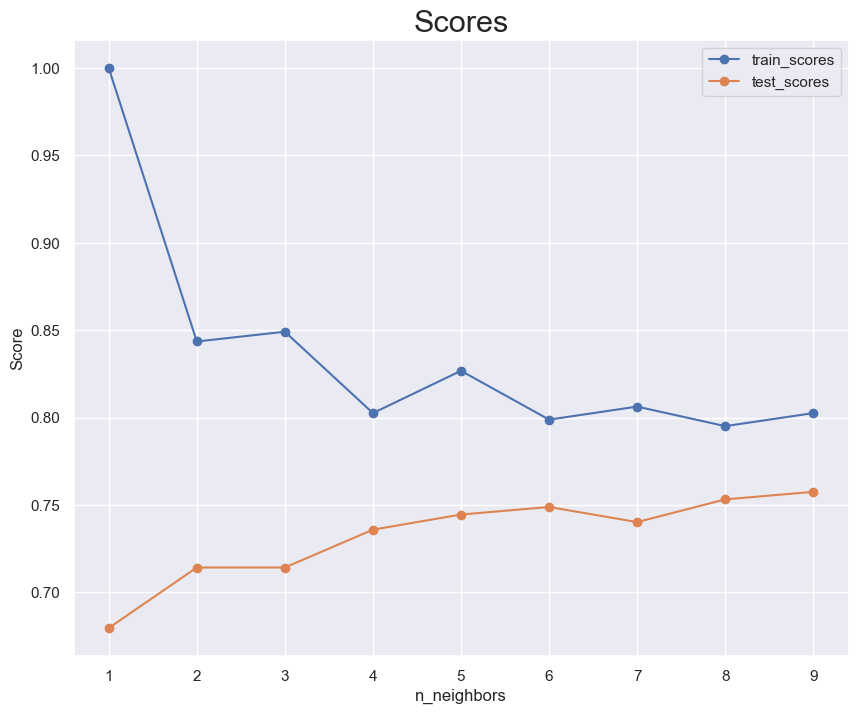

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
scores_df.plot(marker="o", ax=ax)
plt.title("Scores", fontsize=22)
plt.ylabel("Score")
plt.show()

k_max_train = scores_df.loc[2:, "train_scores"].argmax() + 2
k_max_test = scores_df.loc[:, "test_scores"].argmax() + 1

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [19]:
model_k6 = KNeighborsClassifier(n_neighbors=6)
model_k6.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model_k6.predict(X_test_scaled)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [21]:
print(pl)

[[134  19]
 [ 39  39]]


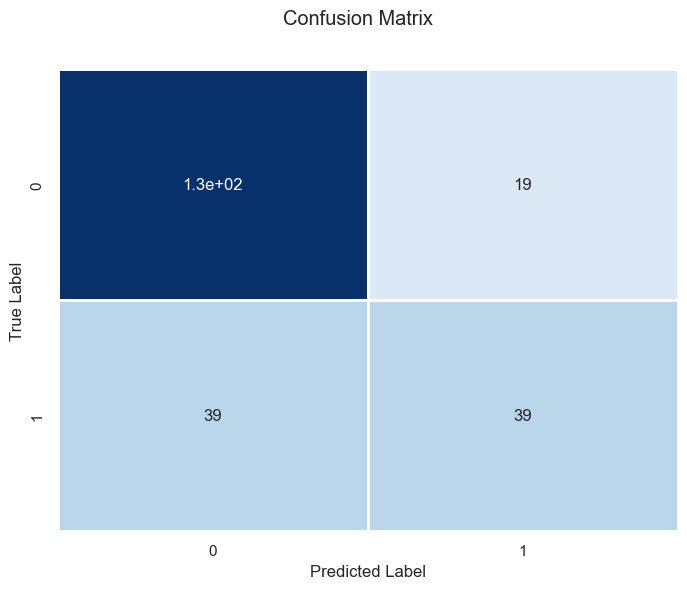

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(pl, cmap="Blues", 
                annot=True, vmin=0,
                linewidths=0.75, cbar=False)
fig.suptitle("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

**<font color='teal'> Print the classification report </font>**

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.67      0.50      0.57        78

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



In [24]:
print(y_test.value_counts())

0    153
1     78
Name: Outcome, dtype: int64


#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [26]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7634648667358948
Best Parameters: {'n_neighbors': 7}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [27]:
from sklearn.ensemble import RandomForestClassifier

params_grid = {"n_estimators": np.arange(10, 1000, 100),
               "max_depth": [10, 50, 100, 1000]}
rand_forest = RandomForestClassifier(n_jobs=-1)
grid_search = GridSearchCV(estimator=rand_forest,
                           param_grid=params_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [10, 50, 100, 1000],
                         'n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])})

In [28]:
print("Best Score:" + str(grid_search.best_score_))
print("Best Parameters: " + str(grid_search.best_params_))

Best Score:0.7821218414676359
Best Parameters: {'max_depth': 50, 'n_estimators': 310}
